In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as se
import math as mh
import plotly.express as pl
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
data1=pd.read_csv('IMDb Movies India.csv',encoding='latin-1')

In [3]:
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data1.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df_movies = data1['Name']

In [6]:
df_movies

0                                          
1        #Gadhvi (He thought he was Gandhi)
2                               #Homecoming
3                                   #Yaaram
4                         ...And Once Again
                        ...                
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15506                             Zulmi Raj
15507                         Zulmi Shikari
15508                          Zulm-O-Sitam
Name: Name, Length: 15509, dtype: object

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
data1.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
nulls = data1[data1.iloc[:, 1:9].isnull().all(axis=1)]

In [10]:
nulls

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,Durga Rani Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,Main Hoon Kaun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,Mughal Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for col in data1.select_dtypes(include='object'):
    print(f'Name of the column :  {col}')
    print(data1[col].unique())
    print("\n"*5)

Name of the column :  Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']






Name of the column :  Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' 

# DROPING DUPLICATES VALUES FROM MOVIE NAMES

In [12]:
data1.drop_duplicates(subset=['Name'],inplace=True)

In [13]:
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13838 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      13838 non-null  object 
 1   Year      13340 non-null  object 
 2   Duration  6599 non-null   object 
 3   Genre     12248 non-null  object 
 4   Rating    7153 non-null   float64
 5   Votes     7154 non-null   object 
 6   Director  13373 non-null  object 
 7   Actor 1   12399 non-null  object 
 8   Actor 2   11706 non-null  object 
 9   Actor 3   11033 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [15]:
data1.dropna(subset=['Year','Duration', 'Genre','Rating','Votes','Director','Actor 1' ,'Actor 2' ,'Actor 3'],inplace=True)


In [16]:
data1=data1.drop_duplicates(subset=['Name'])
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [17]:

data1['Name'] = data1['Name'].str.extract('([A-Za-z\s\'\-]+)')

data1['Year'] = data1['Year'].str.replace(r'[()]', '', regex=True).astype(int)

data1['Duration'] = pd.to_numeric(data1['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

data1['Genre'] = data1['Genre'].str.split(', ')
data1 = data1.explode('Genre')
data1['Genre'].fillna(data1['Genre'].mode()[0], inplace=True)

data1['Votes'] = pd.to_numeric(data1['Votes'].str.replace(',', ''), errors='coerce')


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\win 10\AppData\Local\Temp\ipykernel_8772\1545953453.py:1: SyntaxWarning: invalid escape sequence '\s'
  data1['Name'] = data1['Name'].str.extract('([A-Za-z\s\'\-]+)')


In [18]:
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10872 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      10856 non-null  object 
 1   Year      10872 non-null  int32  
 2   Duration  10872 non-null  int64  
 3   Genre     10872 non-null  object 
 4   Rating    10872 non-null  float64
 5   Votes     10872 non-null  int64  
 6   Director  10872 non-null  object 
 7   Actor 1   10872 non-null  object 
 8   Actor 2   10872 non-null  object 
 9   Actor 3   10872 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 891.8+ KB


In [20]:
data1.describe()

,Year,Duration,Rating,Votes
count,10872.000000,10872.000000,10872.000000,10872.000000
mean,1996.799025,135.263521,5.891060,3440.805372
std,19.149706,25.300290,1.381091,15914.787423
min,1931.000000,21.000000,1.100000,5.000000
25%,1984.000000,120.000000,5.000000,43.000000
50%,2002.000000,136.000000,6.100000,221.000000
75%,2013.000000,152.000000,6.900000,1564.000000
max,2021.000000,321.000000,10.000000,591417.000000


(array([  2.,   0.,   0.,   2.,   0.,   3.,   9.,  10.,  11.,   0.,   5.,
         13.,   8.,  22.,  29.,  38.,  29.,  46.,   0.,  35.,  41.,  24.,
         50.,  53.,  91.,  76.,  80.,   0., 105., 100., 103., 102., 110.,
        131., 160., 138.,   0., 160., 168., 195., 166., 167., 174., 199.,
        226.,   0., 198., 259., 278., 217., 289., 292., 255., 208.,   0.,
        262., 308., 363., 282., 298., 356., 315., 290.,   0., 393., 298.,
        279., 303., 304., 243., 242., 200.,   0., 211., 152., 122.,  90.,
        118., 103.,  85.,  40.,   0.,  39.,  20.,  18.,  11.,   7.,   8.,
          7.,   6.,   0.,   2.,  12.,   4.,   0.,   0.,   2.,   0.,   0.,
          2.]),
 array([ 1.1  ,  1.189,  1.278,  1.367,  1.456,  1.545,  1.634,  1.723,
         1.812,  1.901,  1.99 ,  2.079,  2.168,  2.257,  2.346,  2.435,
         2.524,  2.613,  2.702,  2.791,  2.88 ,  2.969,  3.058,  3.147,
         3.236,  3.325,  3.414,  3.503,  3.592,  3.681,  3.77 ,  3.859,
         3.948,  4.037,  4.126

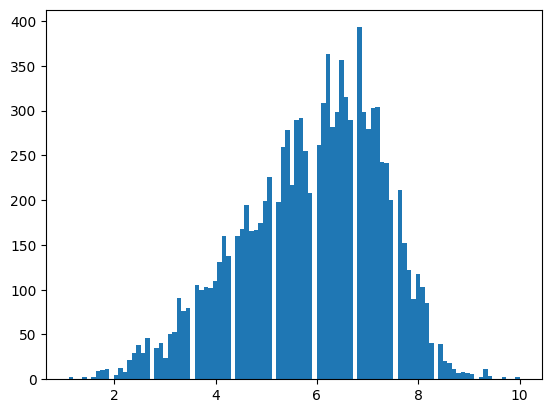

In [21]:
mt.hist(data1['Rating'],bins=100)

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,   9.,   5.,
          7.,  10.,   8.,  22.,  17.,   7.,  19.,  32.,  49.,  48.,  60.,
         70., 168., 143., 173., 213., 186., 256., 301., 219., 250., 276.,
        548., 420., 469., 522., 478., 704., 661., 445., 572., 358., 523.,
        471., 332., 369., 289., 207., 216., 182., 130.,  69., 114.,  40.,
         59.,  18.,  26.,  16.,   7.,   5.,   5.,   7.,   7.,   5.,  10.,
          0.,   8.,   0.,   0.,   0.,   3.,   3.,   5.,   0.,   2.,   1.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([ 21.,  24.,  27.,  30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,
         54.,  57.,  60.,  63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,
         87.,  90.,  93.,  96.,  99., 102., 105., 108., 111., 114., 117.,
        120., 123., 126., 129., 132., 135., 138., 141., 144., 147., 150.,
        153., 156., 15

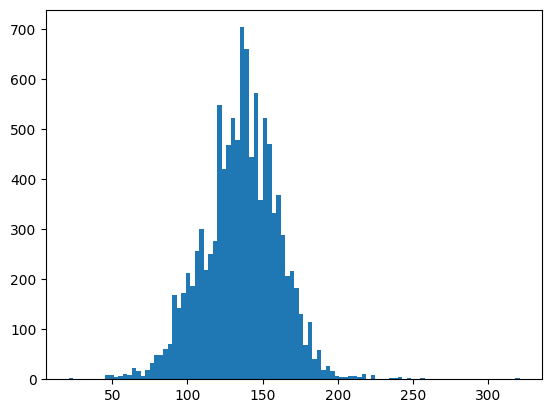

In [22]:
mt.hist(data1['Duration'],bins=100)

(array([  3.,   2.,   2.,   3.,   5.,   8.,   8.,   6.,   4.,   0.,   7.,
          4.,   8.,  12.,   5.,   5.,  11.,   9.,  16.,   0.,  26.,  19.,
         18.,  34.,  28.,  37.,  47.,  44.,  58.,   0.,  57.,  48.,  52.,
         49.,  68.,  58.,  81.,  74.,  87.,   0.,  91.,  89.,  83.,  82.,
         89.,  91.,  81.,  96.,  93.,   0.,  78., 121.,  86., 104., 125.,
        131., 129., 119., 105.,   0., 150., 133.,  95., 128., 168., 147.,
        138., 165., 163.,   0., 155., 115., 133., 142., 141., 156., 167.,
        182., 189.,   0., 217., 220., 261., 228., 274., 257., 267., 302.,
        290.,   0., 279., 347., 326., 333., 338., 354., 336., 398., 263.,
        119.]),
 array([1931. , 1931.9, 1932.8, 1933.7, 1934.6, 1935.5, 1936.4, 1937.3,
        1938.2, 1939.1, 1940. , 1940.9, 1941.8, 1942.7, 1943.6, 1944.5,
        1945.4, 1946.3, 1947.2, 1948.1, 1949. , 1949.9, 1950.8, 1951.7,
        1952.6, 1953.5, 1954.4, 1955.3, 1956.2, 1957.1, 1958. , 1958.9,
        1959.8, 1960.7, 1961.6

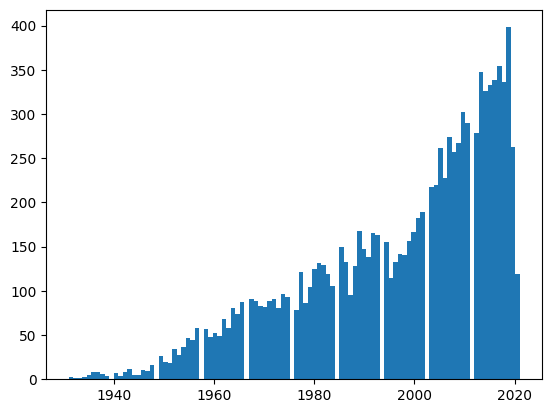

In [23]:
mt.hist(data1['Year'],bins=100)

(array([9.624e+03, 5.250e+02, 2.480e+02, 1.500e+02, 7.900e+01, 5.400e+01,
        2.600e+01, 2.700e+01, 3.900e+01, 1.800e+01, 9.000e+00, 9.000e+00,
        1.100e+01, 1.400e+01, 5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

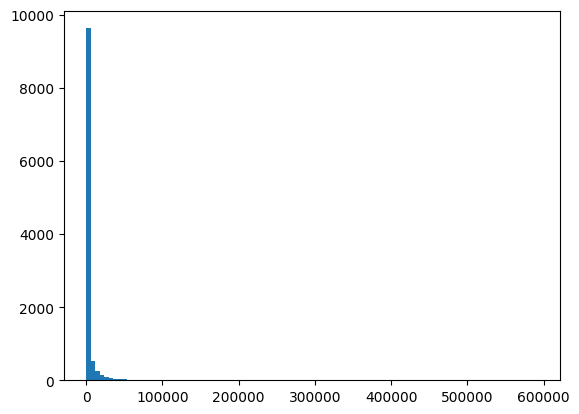

In [24]:
mt.hist(data1['Votes'],bins=100)

<Axes: xlabel='Year', ylabel='Rating'>

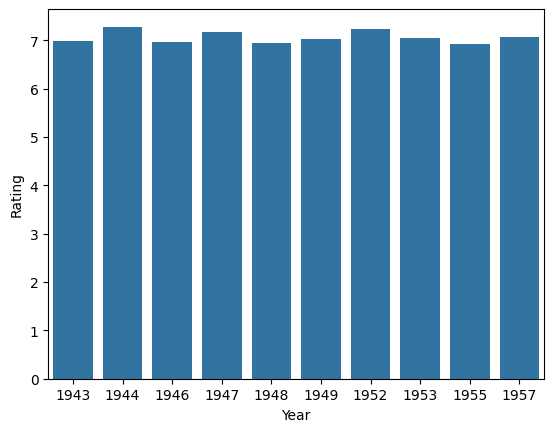

In [25]:
year_avg_rating = data1.groupby('Year')['Rating'].mean().reset_index()

top_10_years = year_avg_rating.nlargest(10, 'Rating')
se.barplot(x='Year',y='Rating',data=top_10_years)

<Axes: xlabel='Year', ylabel='Rating'>

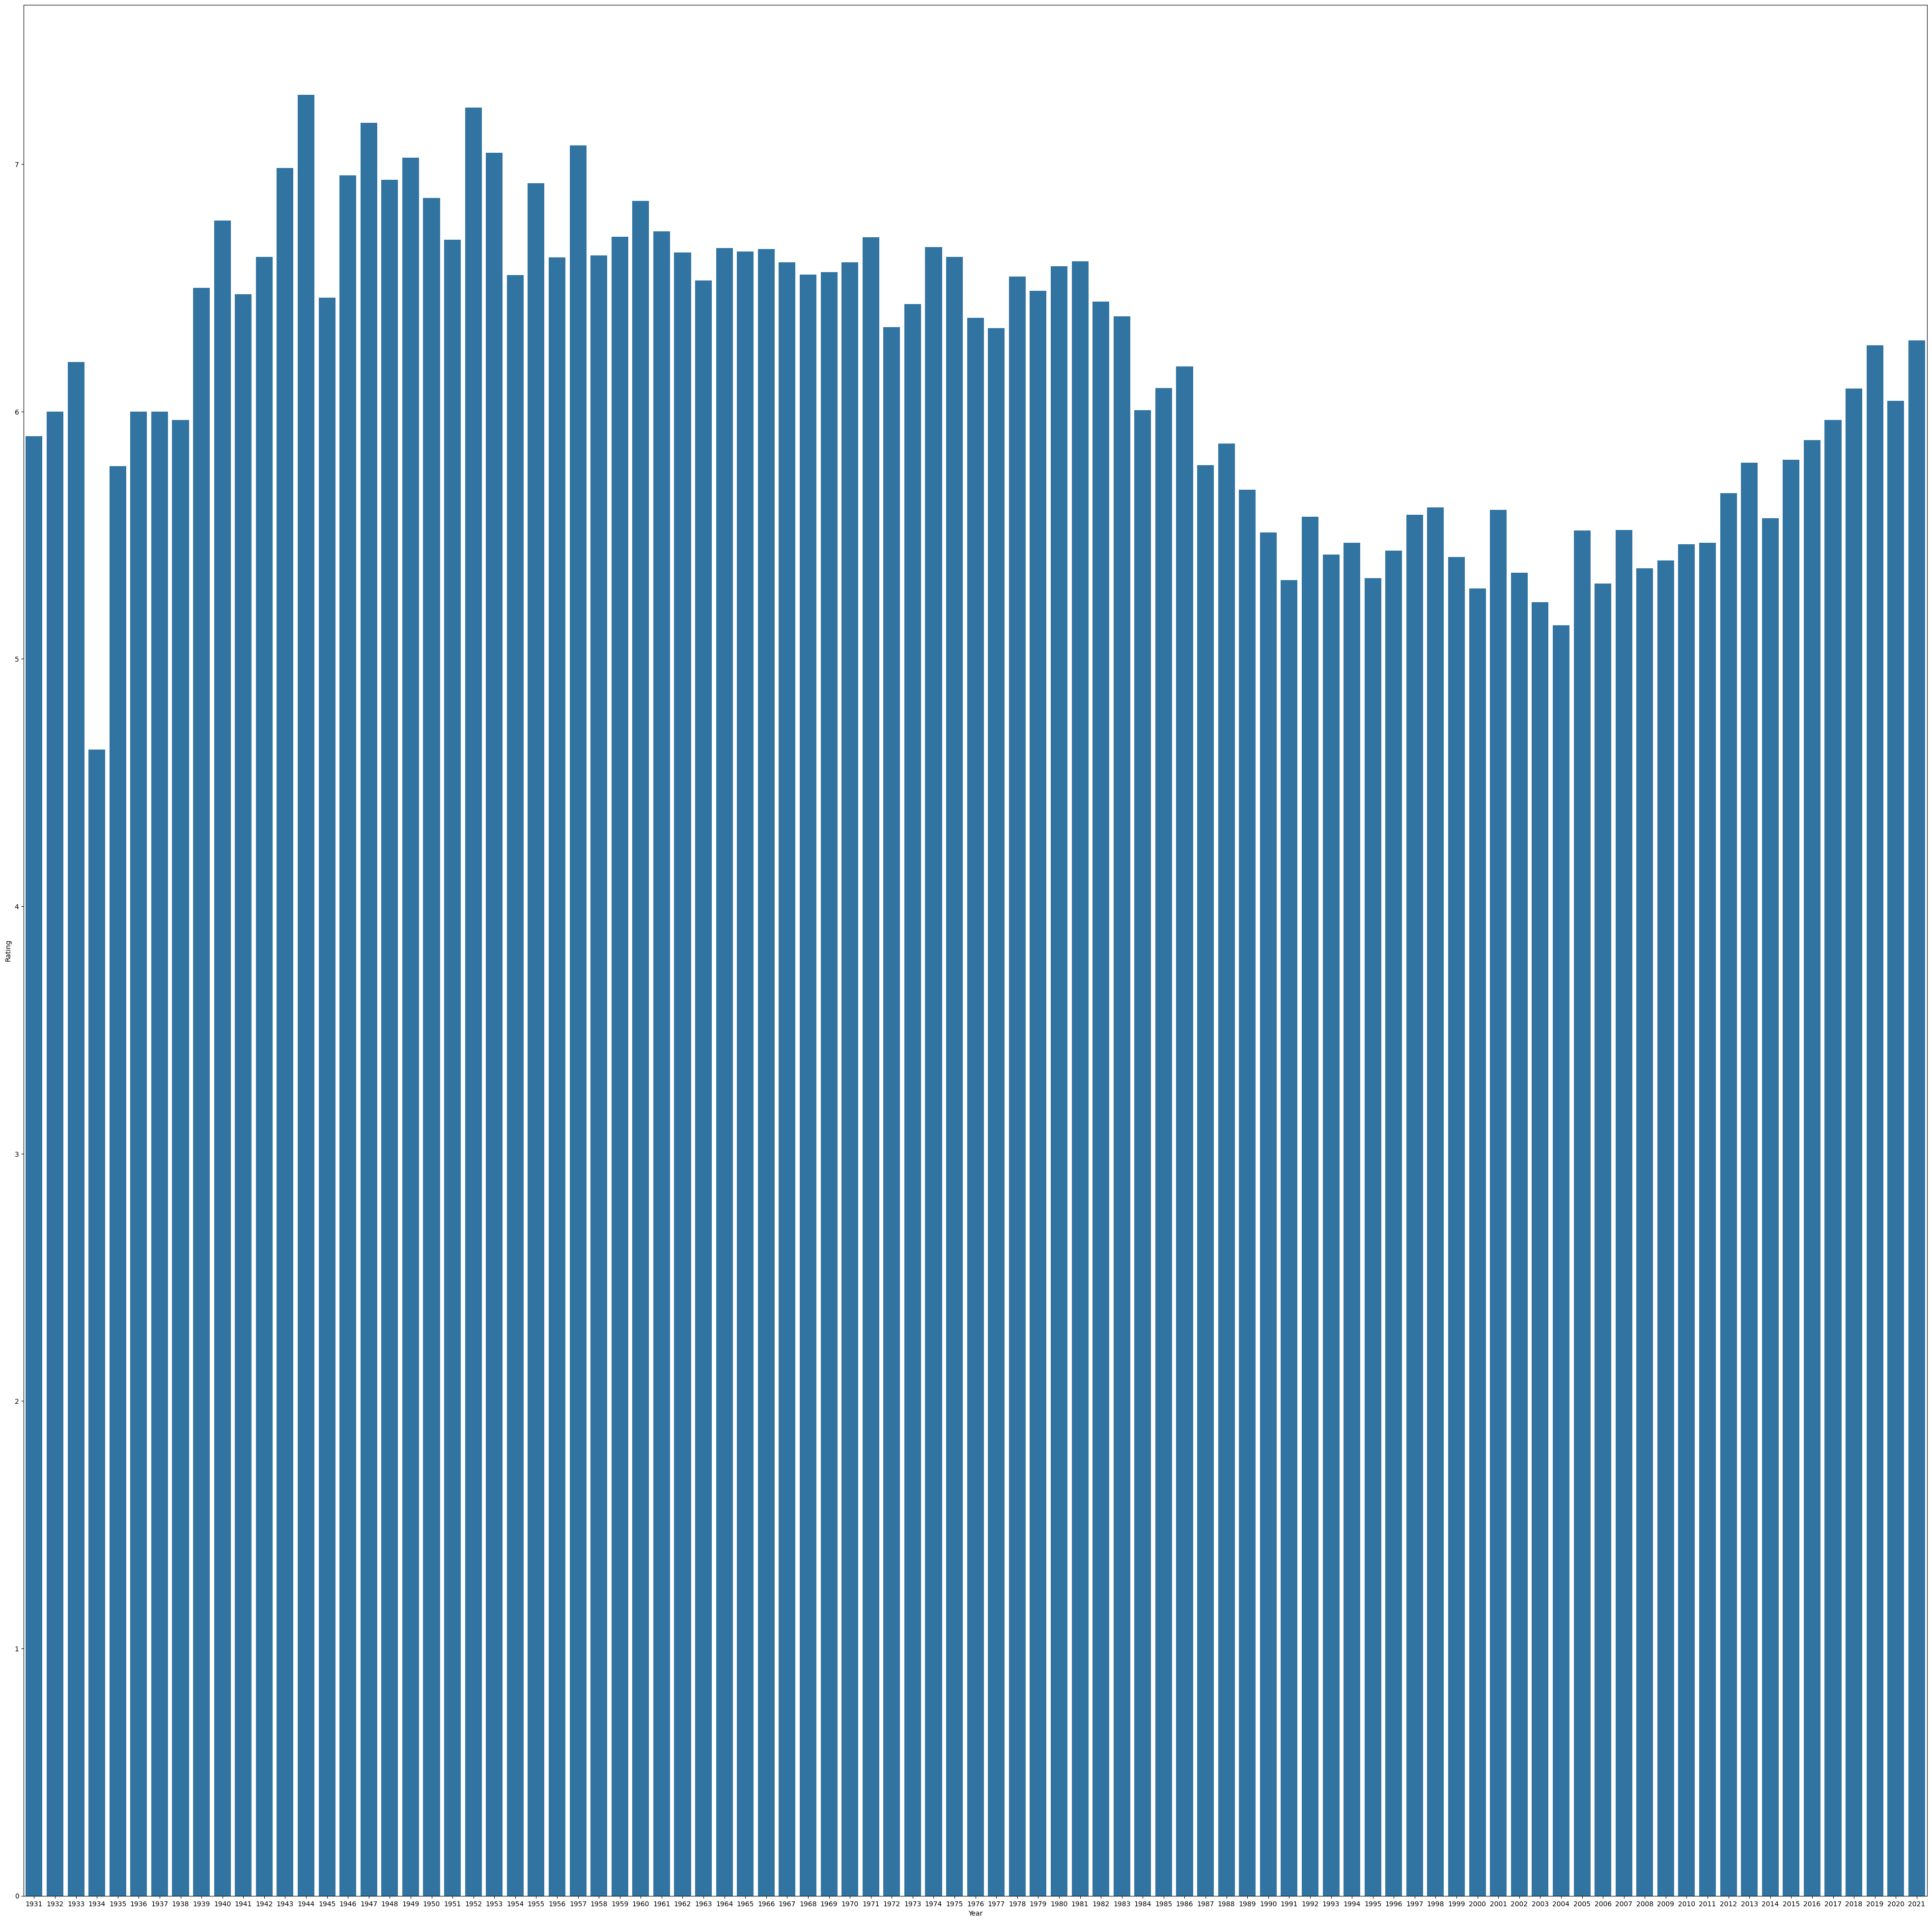

In [26]:
mt.figure(figsize=(50,50))
average_rating_by_year = data1.groupby('Year')['Rating'].mean().reset_index()
se.barplot(x='Year',y='Rating',data=average_rating_by_year)

In [27]:
data1=data1.drop_duplicates(subset=['Name'])
data1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,Biography,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [28]:
data1.drop('Name',axis=1,inplace=True)

C:\Users\win 10\AppData\Local\Temp\ipykernel_8772\1491878238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('Name',axis=1,inplace=True)


In [29]:
data1

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,Biography,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
data1['Genre'].nunique()

20

In [32]:

genre_mean_rating = data1.groupby('Genre')['Rating'].transform('mean')
data1['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data1.groupby('Director')['Rating'].transform('mean')
data1['Director_encoded'] = director_mean_rating

actor1_mean_rating = data1.groupby('Actor 1')['Rating'].transform('mean')
data1['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data1.groupby('Actor 2')['Rating'].transform('mean')
data1['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data1.groupby('Actor 3')['Rating'].transform('mean')
data1['Actor3_encoded'] = actor3_mean_rating
data1

C:\Users\win 10\AppData\Local\Temp\ipykernel_8772\2045855406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Genre_mean_rating'] = genre_mean_rating
C:\Users\win 10\AppData\Local\Temp\ipykernel_8772\2045855406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Director_encoded'] = director_mean_rating
C:\Users\win 10\AppData\Local\Temp\ipykernel_8772\2045855406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.278563,7.000000,6.850000,7.000000,7.000000
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.837460,4.400000,5.420000,4.400000,4.450000
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.837460,5.200000,4.885714,5.814286,5.872727
6,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.278563,7.383333,5.343750,6.933333,6.657143
8,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,4.640179,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.278563,6.100000,7.166667,6.100000,5.850000
15494,2001,153,Biography,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.660000,7.250000,4.157143,5.786047,5.954545
15503,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.549755,6.270000,6.307692,5.800000,6.050000
15505,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.549755,5.250000,5.552941,4.783333,5.666667


In [33]:
X = data1[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = data1['Rating']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=30)

In [35]:
random_model=RandomForestRegressor()

In [36]:
random_model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
random_model.score(x_test,y_test)

0.8413403428036482

In [38]:
linear_model=LinearRegression()


In [39]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [40]:
linear_model.score(x_test,y_test)

0.8097670760199329

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
tree_model=DecisionTreeRegressor()

In [43]:
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [44]:
tree_model.score(x_test,y_test)

0.6679080411422388